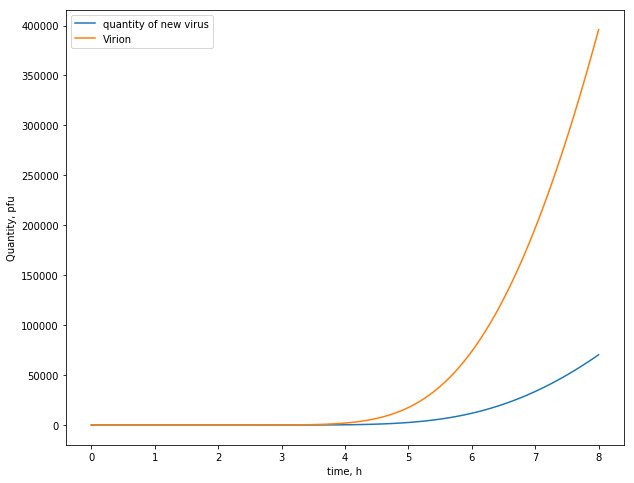

Optimization terminated successfully.
         Current function value: 0.000043
         Iterations: 373
         Function evaluations: 681
[6.91577414e-01 1.08468713e+00 9.81843891e-01 1.00503189e-01
 9.77816991e-01 3.80212190e-01 1.03790027e+00 1.06450852e+00
 1.01180792e+00 5.37129201e+00 9.87723517e-01 1.51908230e+00
 4.02576283e-02 1.98891455e-02 4.93828449e-04 1.02040795e+00
 9.73237300e-01 5.23160834e+00]


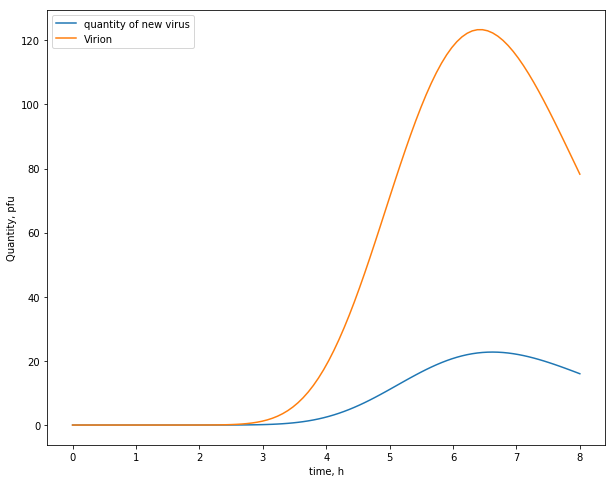

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fmin

def init_par():
    p = np.zeros([18,1])
    p[0] = 1     # k_bound
    p[1] = 1      # d_virus
    p[2] = 0.936     # k_fuse
    p[3] = 0.1       # d_bound
    p[4] = 1      # k_end
    p[5] = 0.4      # k_tr
    p[6] = 1     # d_p_degr
    p[7] = 1      # d_RNA
    p[8] = 1    # k_transl
    p[9] = 5   # d_proteins
    p[10] = 1     #k_repl
    p[11] = 1.4     # k_GP
    p[12] = 0.04    # d_gp
    p[13] = 0.02    # d_GP1
    p[14] = 0.0005  # k_comb
    p[15] = 1   # d_comb
    p[16] = 1       # k_bud
    p[17] = 5   # d_bud
    return  p

def init_y():
    V_free0 = 100
    V_bound0 = 0
    mRNA__l0 = 0
    mRNA__s0 = 0
    mRNA_l0 = 0
    mRNA_s0 = 0
    P_l0 = 0
    P_z0 = 0
    P_gp0 = 0
    P_np0 = 0
    P_gp10 = 0
    P_gp20 = 0
    V_virion0 = 0
    V_bud0 = 0
    y0 = [V_free0,V_bound0,mRNA__l0,mRNA__s0,mRNA_l0,mRNA_s0,P_l0,P_z0,P_gp0,P_np0,P_gp10,P_gp20,V_virion0,V_bud0]
    return  y0


def plot1(res):
    V_free = res[:, 0]
    V_bound = res[:, 1]
    mRNA__l = res[:, 2]
    mRNA__s = res[:, 3]
    mRNA_l = res[:, 4]
    mRNA_s = res[:, 5]
    P_l = res[:, 6]
    P_z = res[:, 7]
    P_np = res[:, 8]
    P_gp = res[:, 9]
    P_gp1 = res[:, 10]
    P_gp2 = res[:,11]
    V_virion = res[:, 12]
    V_bud = res[:, 13]
    plt.rcParams['figure.figsize'] = 10, 8
    plt.figure()
    plt.plot(t, V_bud, label='quantity of new virus')
    plt.plot(t, V_virion, label='Virion')
    #plt.plot(t, mRNA_l, label='mRNA_l')
    #plt.plot(t, mRNA_l, label='mRNA_s')
    #plt.plot(t, V_virion, label='mRNA__l')
    #plt.plot(t, P_l, label='P_l')
    plt.xlabel('time, h')
    plt.ylabel('Quantity, pfu')
    #plt.yscale("log")
    plt.title('')
    plt.legend(loc=0)
    plt.show()

def plot_all(t, y):
    plt.figure()
    for v in y.T:
        plt.plot(t, v)
        plt.xlabel('time, h')
        plt.ylabel('Quantity, pfu')
        plt.show()

def odesys(y, t, p):
    V_free = y[0]
    V_bound = y[1]
    mRNA__l = y[2]
    mRNA__s = y[3]
    mRNA_l = y[4]
    mRNA_s = y[5]
    P_l = y[6]
    P_z = y[7]
    P_np = y[8]
    P_gp = y[9]
    P_gp1 = y[10]
    P_gp2 = y[11]
    V_virion = y[12]
    V_bud = y[13]
    f = np.zeros_like(y)
    f[0] = - p[0] * V_free - p[1]*V_free
    f[1] = p[0] * V_free - (p[2]+p[3])* V_bound
    f[2] = p[4] * V_bound - p[7] * mRNA__l
    f[3] = p[4] * V_bound - p[7] * mRNA__s
    f[4] = mRNA__l * p[5] - p[7] * mRNA_l
    f[5] = mRNA__l * p[5] - p[7] * mRNA_s
    f[6] = p[8] * mRNA_l - p[6] * P_l
    f[7] = p[8]  * mRNA_l - p[6] * P_z
    f[8] = p[8]  * mRNA_s - p[6] * P_gp
    f[9] = p[8]  * mRNA_s - p[6] * P_np
    f[10] = p[11] * P_gp - p[12] * P_gp1
    f[11] = p[11] * P_gp - p[12] * P_gp2
    f[12] = p[14] * P_gp1*P_gp2*P_l*P_z*P_np - (p[16] + p[15])* V_virion
    f[13] = p[16] * V_virion - p[17] * V_bud
    return f

def optfun(p, t, optval):
    y0 = init_y()
    res = odeint(odesys, y0, t, args=(p,))
    return np.abs(res[-1,-1] - optval)

t = np.linspace(0, 8., 100)
p = init_par()
y0 = init_y()

# with initial parameters
result = odeint(odesys, y0, t, args=(p,))
plot1(result)
#plot_all(t, result)

optval = 16
optpar = fmin(optfun, p, args=(t, optval))
print(optpar)

# with optimal parameters
result = odeint(odesys, y0, t, args=(optpar,))
#plot_all(t, result)
plot1(result)
